In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
mouse_metadata
study_results

merged_data=pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID","Mouse ID"])
merged_data.head()

organized_merged_data=merged_data[["Mouse ID", "Timepoint", "Drug Regimen", "Sex", "Age_months", "Weight (g)", "Tumor Volume (mm3)", "Metastatic Sites"]]
organized_merged_data

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [67]:
# Checking the number of mice.
unique_mice=organized_merged_data['Mouse ID'].unique()
unique_mice
len(unique_mice)


249

In [68]:
print(organized_merged_data.duplicated())
#new_df=organized_merged_data.drop_duplicates(inplace=True)
#new_df.head()


0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Length: 1893, dtype: bool


In [69]:
duplicates_gone=organized_merged_data.drop_duplicates(subset=['Mouse ID','Timepoint'])
len(duplicates_gone['Mouse ID'].unique())
duplicates_gone

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,0,Ramicane,Male,21,16,45.000000,0
1,k403,5,Ramicane,Male,21,16,38.825898,0
2,k403,10,Ramicane,Male,21,16,35.014271,1
3,k403,15,Ramicane,Male,21,16,34.223992,1
4,k403,20,Ramicane,Male,21,16,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,25,Naftisol,Male,9,30,63.145652,2
1889,z969,30,Naftisol,Male,9,30,65.841013,3
1890,z969,35,Naftisol,Male,9,30,69.176246,4
1891,z969,40,Naftisol,Male,9,30,70.314904,4


In [70]:
#mean of Drug regimen and tumor volume

list_drugs=duplicates_gone['Drug Regimen'].tolist()
list_drugs

index_tum_drug=duplicates_gone.set_index('Drug Regimen')['Tumor Volume (mm3)']
tum_drug_grouped=index_tum_drug.groupby('Drug Regimen')
tum_drug_grouped.mean()

#median of Drug regimen and tumor volume
median_tum_drug=tum_drug_grouped.median()
median_tum_drug
#Calculate the variance
var_tum_drug=tum_drug_grouped.var()
var_tum_drug
#std dev by drug
std_tum_drug=tum_drug_grouped.std()
std_tum_drug
#sem by drug
sem_tum_drug=tum_drug_grouped.sem()
sem_tum_drug

#create a summary DataFrame
summary_df=pd.DataFrame({
    "Mean Tumor Volume (mm3)": tum_drug_grouped.mean(),
    "Median Tumor Volume (mm3)": median_tum_drug,
    "Variance Tumor Volume (mm3)": var_tum_drug,
    "Standard Deviation Total Volume (mm3)": std_tum_drug,
    "Standard Error of the Mean Total Volume (mm3)": sem_tum_drug
})

summary_df

#do same as above but with agg function
#agg_sum_df=tum_drug_grouped.agg(['mean','median','var','std','sem'])
#agg_sum
                                                 
                                                 #agg_sum_df

,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Total Volume (mm3),Standard Error of the Mean Total Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


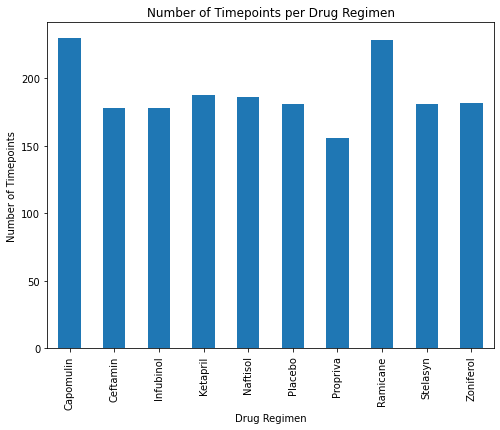

In [71]:
#timepoints for each Drug Regimen using Pandas Plot
drug_tp=duplicates_gone.groupby('Drug Regimen')
drug_tp

timepoint_count=drug_tp['Timepoint'].count()
timepoint_count

drug_tp_chart=timepoint_count.plot(kind='bar',figsize=(8,6))
drug_tp_chart

drug_tp_chart.set_xlabel("Drug Regimen")
drug_tp_chart.set_ylabel("Number of Timepoints")
drug_tp_chart.set_title("Number of Timepoints per Drug Regimen")

plt.show()

Text(0, 0.5, 'Number of Timepoints')

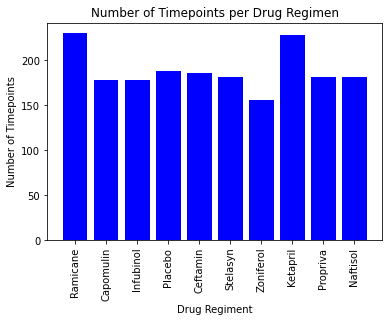

In [72]:
#timepoints for each Drug Regimen using pyplot
list_drugs=duplicates_gone['Drug Regimen'].unique()
list_drugs

x_axis=list_drugs
y_axis=timepoint_count

plt.bar(x_axis,y_axis,color='b')
plt.xticks(rotation=90)

plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regiment")
plt.ylabel("Number of Timepoints")

930
958


Text(0, 0.5, 'Sex')

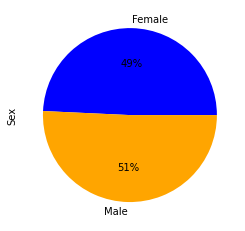

In [73]:


male_mice=duplicates_gone.loc[duplicates_gone['Sex']=='Male']
len(male_mice)

female_mice=duplicates_gone.loc[duplicates_gone['Sex']=='Female']
len(female_mice)


#plot distribution of male and female mice using pyplot
print (len(female_mice))
print (len(male_mice))

sexes=['Female','Male']
counts=[len(female_mice),len(male_mice)]
colors=["blue","orange"]

plt.pie(counts,labels=sexes,colors=colors,autopct="%1.0f%%")
plt.ylabel("Sex")


Text(0, 0.5, 'Sex')

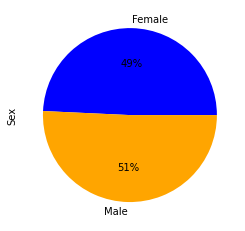

In [74]:
#plot distribution of male and female mice using pandas plot
grouped_sex=duplicates_gone.groupby('Sex')
grouped_sex

grouped_sex_count=grouped_sex['Mouse ID'].count()
grouped_sex_count

grouped_sex_count_chart=grouped_sex_count.plot(kind='pie',autopct="%1.0f%%",colors=['blue','orange'])
grouped_sex_count_chart

grouped_sex_count_chart.set_ylabel('Sex')

In [78]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_time=duplicates_gone.groupby(['Mouse ID'])
max_timepoint_byMouseID=group_time['Timepoint'].max()
pd.DataFrame(max_timepoint_byMouseID)
max_timepoint_byMouseID



# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 249, dtype: int64

In [81]:
including_maxtp=pd.merge(duplicates_gone, max_timepoint_byMouseID, how="right", on=["Mouse ID","Timepoint"])
including_maxtp

# Put treatments into a list for for loop (and later for plot labels)
drug_regimens=['Capomulin','Ramicane','Infubinol','Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)
tum_vol=[]


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    



,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3
